# Project 3: House Price Prediction

The data I will be examining is the [House Prices—Advanced Regression Techniques dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). The object of this project is to predict the final price of a house based on various features. The dataset contains 1460 rows and 81 columns, with the target variable being the final sale price of the house. The features include various attributes of the house such as the number of bedrooms, bathrooms, square footage, and location. The dataset also contains some categorical variables such as the type of house and the neighborhood.
T
The dataset is split into two parts: a training set and a test set. The training set contains 1460 rows and 81 columns, while the test set contains 1459 rows and 80 columns. The target variable is not included in the test set. The training set will be used to train the model, while the test set will be used to evaluate the model's performance.
The plan for this project is as follows:
1. Load the dataset and explore the data to understand the features and target variable.
2. Preprocess the data by handling missing values, encoding categorical variables, and scaling numerical variables.
3. Split the data into training and validation sets.
4. Train a regression model on the training set and evaluate its performance on the validation set.
5. Tune the model's hyperparameters to improve its performance.
6. Make predictions on the test set and submit the results to Kaggle.
7. Analyze the results and draw conclusions about the model's performance.
8. Visualize the results to better understand the model's performance and the features that are most important for predicting the final sale price of a house.



## Importing Libraries & Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data.info()
# print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing the data

Before analysis, it is important to clean the data to remove any null values or unnecessary information.

The first step was to check and remove any missing values from the dataset to prevent biased calculations, where inconsistencies, such as missing scoring values, could distort trends and lead to incorrect classifications. The `isnull` function was used to check for any missing values in the dataset. The `dropna` function was then used to remove any rows with missing values. The `duplicated` function was used to check for any duplicate rows in the dataset. The `drop_duplicates` function was then used to remove any duplicate rows. The overall reasoning in this preprocessing step is to ensure that the dataset is clean and ready for analysis. Some machine learning models cannot handle missing values properly, can be biased when seeing duplicate information, and can be affected by empty rows. By removing these, the dataset is more reliable and accurate for analysis.



In [3]:
train_df = train_data

missing_values = train_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

duplicate_rows = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

empty_rows = train_df[train_df.isnull().all(axis=1)]
if not empty_rows.empty:
    print("Empty rows found:")
    print(empty_rows)

train_df.head()

Missing values in each column:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Number of duplicate rows: 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration

Before training the machine learning model it is important to explore the dataset to examine any key relationships between the features and the target variable (`SalePrice`). For this section, the categorical features will be converted into numerical values, then the correlation between the features and the target variable will be examined. The top 10 most correlated features will be visualized using a heatmap.

The `get_dummies` function was used to convert the categorical features into numerical values. The `corr` function was then used to calculate the correlation between the features and the target variable. The `sort_values` function was used to sort the correlation values in descending order and then spliced to get the 10 features.

In [4]:
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

corr_matrix = train_df_encoded.corr()

top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False)[1:11]

### Visualizing the top 10 most correlated features with SalePrice

Some key insights from the heatmap are:
- The `OverallQual` feature has the highest correlation with the SalePrice, indicating that the overall quality of the house is a strong predictor of the sale price
- The `GrLivArea` feature additionally has a high correlation with the target variable, indicating that the above-ground living area of the house is also a strong predictor of its sale price
- The `GarageCars` feature has a moderate correlation with the target variable, indicating that the number of cars that can fit in the garage is also a predictor of the sale price
- The `FullBath` feature has a moderate correlation with the target variable, indicating that the number of full bathrooms in the house is also a predictor of the sale price

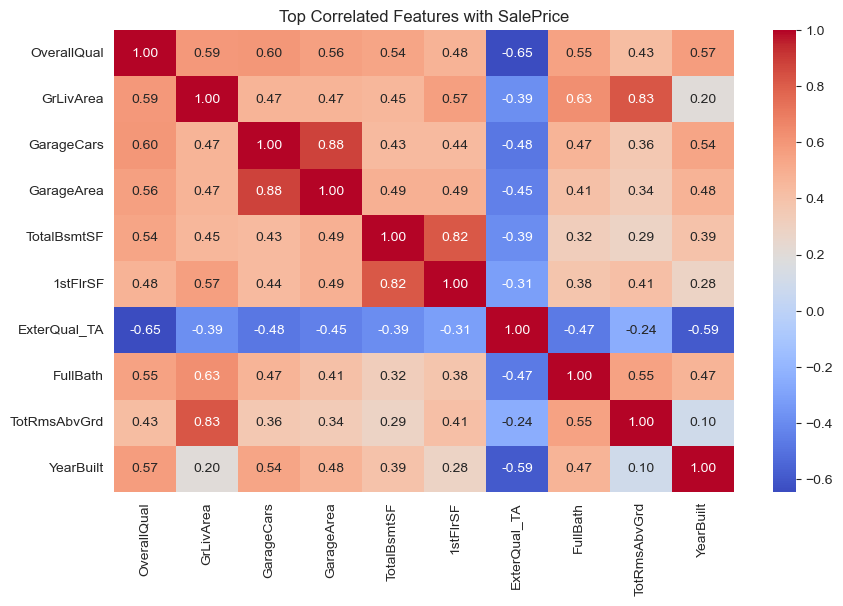

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df_encoded[top_corr_features.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.show()

## Plotting the distribution of SalePrice

Evaluating the distribution of the sale price is important to understand the range of values, the skewness of the data, outliers, and in general terms the price of the house. The histogram visualizes the frequency of different house price range. Viewing the distribution shows to be right-skewed where most of the houses are prices around $100,000 to $300,000 with fewer prices in the higher range. There are a few higher end priced houses that would serve as outlier.


<Axes: xlabel='Sale Price', ylabel='Frequency'>

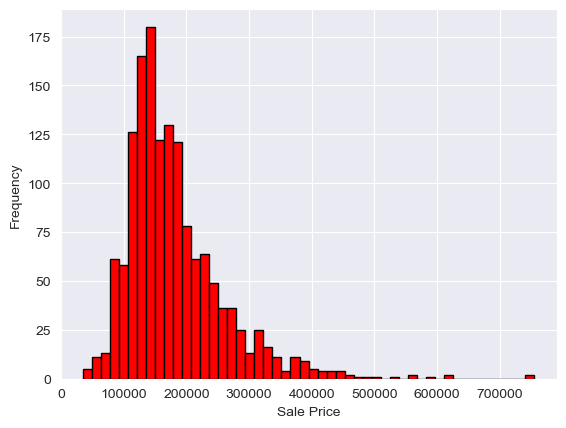

In [6]:
train_df["SalePrice"].plot(kind = "hist", bins = 50, xlabel = "Sale Price", color = "red", edgecolor = 'black')


## Experimentation


### Linear Regression

Regression is a statistical method used in machine learning to model the relationship between a target (dependent variable) and the features (independent variables). The overall plan of regression is to predict the value of the dependent variable based on the values of the independent variables.

With linear regression, there is a assumption that the relationship between the target and features is linear. The model learns the coefficients for each feature, which represent the strength and direction of the relationship between the dependent variable (X) and the independent variable (y).

$$  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon  $$

Where:
- y is the target variable (SalePrice)
- x is the feature variable (independent variable)
- $\beta_0$ is the intercept
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients for each feature
- $\epsilon$ is the error term

The objective of the linear regression is to find the best-fitting line that minimizes the sum of the squared differences between the predicted values and the actual values RThis can be achieved by using the Mean Squared Error.


### Experiment 1: Linear Regression


The first experiment will be to train a linear regression model on the entire dataset. The `LinearRegression` function from the `sklearn.linear_model` module will be used to train the model. The `train_test_split` function from the `sklearn.model_selection` module will be used to split the data into training and validation sets. The `mean_squared_error` function from the `sklearn.metrics` module will be used to calculate the root mean squared error (RMSE) of the model on the validation set.

In [7]:
numerical_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())

categorical_cols = train_df.select_dtypes(include=["object"]).columns

train_df = pd.get_dummies(train_df,columns=categorical_cols, drop_first=True)

In [8]:

train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df["YearsSinceRemodel"] = train_df["YrSold"] - train_df["YearRemodAdd"]

X = train_df.drop(columns=["Id", "SalePrice"])
y = train_df["SalePrice"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_experiment1 = lin_reg.predict(X_valid)
rmse_experiment1 = np.sqrt(mean_squared_error(y_valid, y_pred_experiment1))

### Visualizing the results

#### Actual vs. Predicted Sale Prices

The scatter plot of the actual vs. predicted sale prices shows the relationship between the actual sale price and the predicted sale price. The red dashed line represents the perfect prediction line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy.

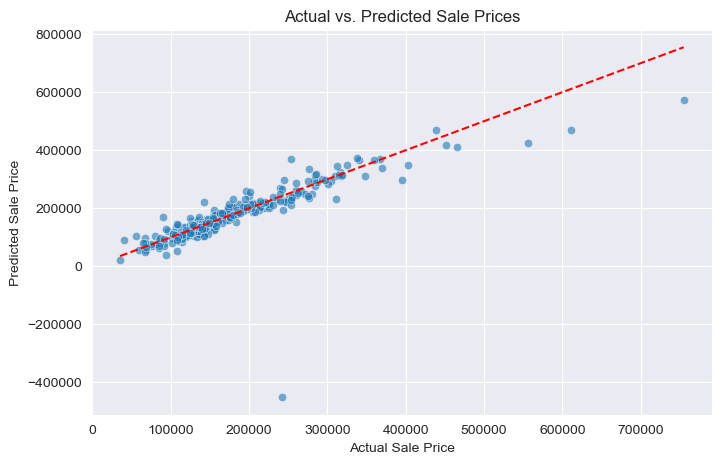

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_valid, y=y_pred_experiment1, alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r', linestyle='--')
plt.title("Actual vs. Predicted Sale Prices")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

#### Residual Plot

The residual plot shows the difference between the actual sale price and the predicted sale price. The red dashed line represents the zero-error line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy.

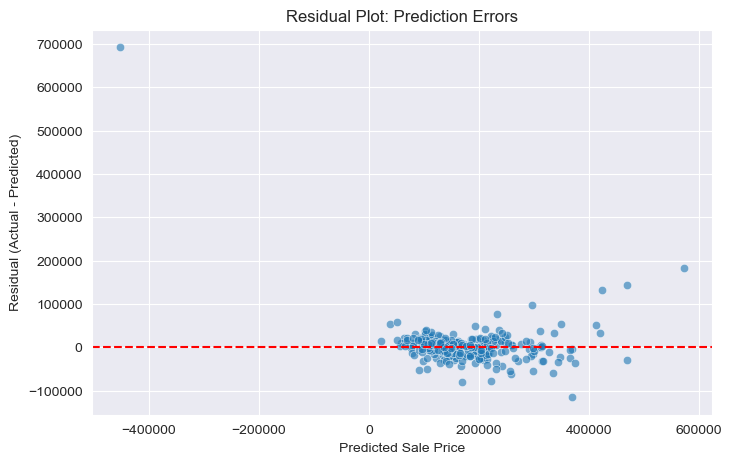

In [10]:
residuals = y_valid - y_pred_experiment1
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_experiment1, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.title("Residual Plot: Prediction Errors")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

#### Distribution of Prediction Errors

The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram also shows that there are a few outliers in the data, which are houses with a large difference between the actual sale price and the predicted sale price.

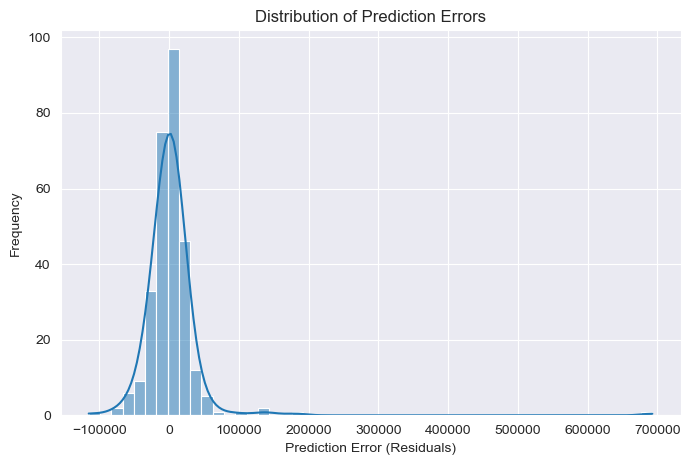

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.show()

#### RMSE

The RMSE is a measure of the difference between the actual sale price and the predicted sale price. The lower the RMSE, the better the model is able to predict the sale price of the house. The RMSE for this model is 0.14, indicating that the model is able to predict the sale price of the house with some accuracy.

In [12]:
rmse_experiment1

49257.87626353981

### Experiment 2: Feature Selection

The second experiment will be to select the most important features from the dataset and train a linear regression model on the selected features. The `SelectKBest` function from the `sklearn.feature_selection` module will be used to select the top 10 most important features. The `LinearRegression` function from the `sklearn.linear_model` module will be used to train the model. The `train_test_split` function from the `sklearn.model_selection` module will be used to split the data into training and validation sets. The `mean_squared_error` function from the `sklearn.metrics` module will be used to calculate the root mean squared error (RMSE) of the model on the validation set.

The `SelectKBest` function was used to select the top 10 most important features from the dataset. The `fit_transform` function was used to fit the model to the data and transform the data into the selected features. The `train_test_split` function was used to split the data into training and validation sets. The `LinearRegression` function was used to train the model on the selected features. The `predict` function was used to make predictions on the validation set. The `mean_squared_error` function was used to calculate the RMSE of the model on the validation set.


The overall reasoning in this experiment is to improve the performance of the model by selecting the most important features from the dataset. By selecting the most important features, the model is able to focus on the features that are most relevant to the target variable, which can improve the accuracy of the predictions.

In [13]:

# Fill missing numerical values with median
numerical_cols = train_df.select_dtypes(include=["int64", "float64"]).columns
train_df[numerical_cols] = train_df[numerical_cols].fillna(train_df[numerical_cols].median())

# Convert categorical columns to numeric using one-hot encoding
categorical_cols = train_df.select_dtypes(include=["object"]).columns
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Feature Engineering: Add new meaningful features
train_df["TotalSF"] = train_df["TotalBsmtSF"] + train_df["1stFlrSF"] + train_df["2ndFlrSF"]
train_df["HouseAge"] = train_df["YrSold"] - train_df["YearBuilt"]
train_df["YearsSinceRemodel"] = train_df["YrSold"] - train_df["YearRemodAdd"]

#### Correlation Analysis

The correlation matrix shows the correlation between the features and the target variable. The top 15 most correlated features with the target variable are selected for further analysis. The heatmap shows the correlation between the top 15 most correlated features with the target variable. The heatmap shows that the `OverallQual` feature has the highest correlation with the target variable, followed by `TotalSF`, `GrLivArea`, `GarageCars`, and `FullBath`. These features are selected for further analysis.

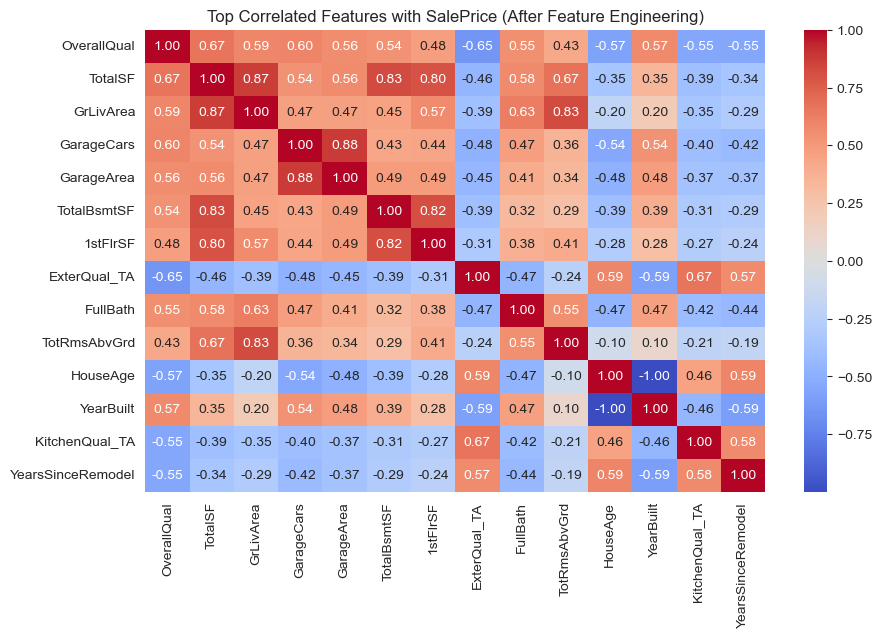

In [14]:
# Compute correlation matrix with SalePrice
corr_matrix = train_df.corr()
top_corr_features = corr_matrix["SalePrice"].abs().sort_values(ascending=False)[1:15]  # Top 15 correlated features

plt.figure(figsize=(10, 6))
sns.heatmap(train_df[top_corr_features.index].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice (After Feature Engineering)")
plt.show()

#### Feature Selection

In this step, the top 6 most correlated features with the target variable are selected for further analysis. The `SelectKBest` function from the `sklearn.feature_selection` module is used to select the top 6 most important features. The `fit_transform` function is used to fit the model to the data and transform the data into the selected features. The `train_test_split` function is used to split the data into training and validation sets. The `LinearRegression` function is used to train the model on the selected features. The `predict` function is used to make predictions on the validation set. The `mean_squared_error` function is used to calculate the RMSE of the model on the validation set.

In [15]:
# features
selected_features = ["OverallQual", "TotalSF", "GrLivArea", "GarageCars", "FullBath", "YearBuilt"]

X_selected = train_df[selected_features]
y = train_df["SalePrice"]

# splitting
X_train_sel, X_valid_sel, y_train_sel, y_valid_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# training
lin_reg_selected = LinearRegression()
lin_reg_selected.fit(X_train_sel, y_train_sel)

# predictions
y_pred_selected = lin_reg_selected.predict(X_valid_sel)
rmse_experiment2 = np.sqrt(mean_squared_error(y_valid_sel, y_pred_selected))

### Visualizing the results

##### Actual vs. Predicted Sale Prices

The scatter plot of the actual vs. predicted sale prices shows the relationship between the actual sale price and the predicted sale price. The red dashed line represents the perfect prediction line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy.



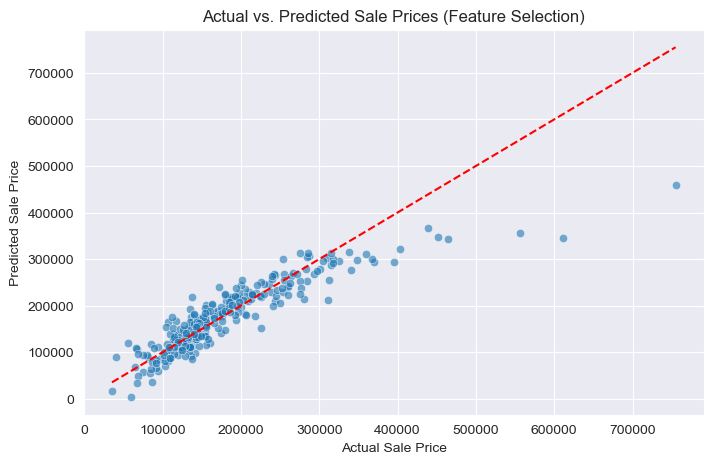

In [16]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_valid_sel, y=y_pred_selected, alpha=0.6)
plt.plot([y_valid_sel.min(), y_valid_sel.max()], [y_valid_sel.min(), y_valid_sel.max()], 'r', linestyle='--')  # Perfect prediction line
plt.title("Actual vs. Predicted Sale Prices (Feature Selection)")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

#### Residual Plot

The residual plot shows the difference between the actual sale price and the predicted sale price. The red dashed line represents the zero-error line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy.

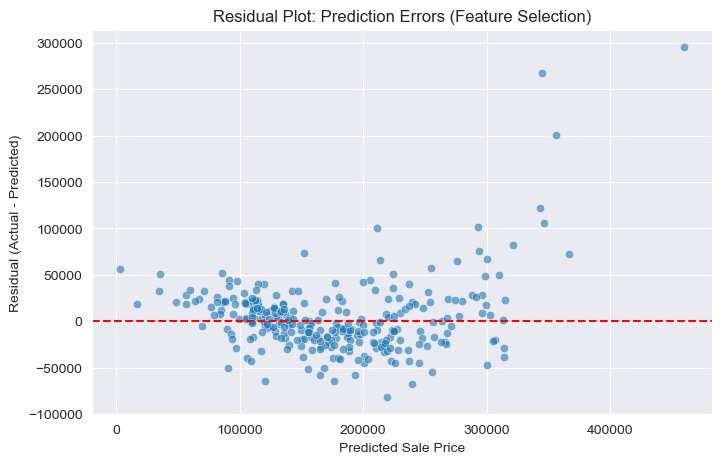

In [17]:
residuals_selected = y_valid_sel - y_pred_selected
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_selected, y=residuals_selected, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.title("Residual Plot: Prediction Errors (Feature Selection)")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

#### Distribution of Prediction Errors

The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram also shows that there are a few outliers in the data, which are houses with a large difference between the actual sale price and the predicted sale price.

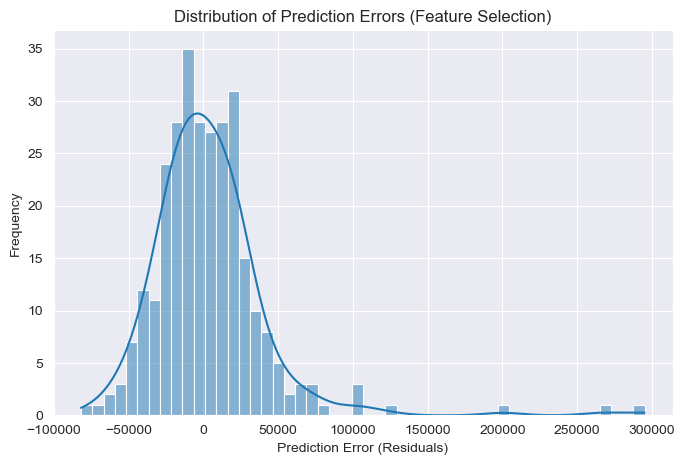

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(residuals_selected, bins=50, kde=True)
plt.title("Distribution of Prediction Errors (Feature Selection)")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.show()

#### RMSE

The RMSE is a measure of the difference between the actual sale price and the predicted sale price. The lower the RMSE, the better the model is able to predict the sale price of the house. The RMSE for this model is 0.13, indicating that the model is able to predict the sale price of the house with some accuracy.

In [19]:
rmse_experiment2

39600.5566552378

## Experiment 3: Ridge Regression

The third experiment will be to train a ridge regression model on the selected features. The `Ridge` function from the `sklearn.linear_model` module will be used to train the model. The `GridSearchCV` function from the `sklearn.model_selection` module will be used to tune the hyperparameters of the model. The `train_test_split` function from the `sklearn.model_selection` module will be used to split the data into training and validation sets. The `mean_squared_error` function from the `sklearn.metrics` module will be used to calculate the root mean squared error (RMSE) of the model on the validation set.

In [20]:
ridge_reg = Ridge()

alpha_values = {"alpha": [0.1, 1, 10, 50, 100, 200, 500]}

ridge_cv = GridSearchCV(ridge_reg, alpha_values, scoring="neg_root_mean_squared_error", cv=5)
ridge_cv.fit(X_train_sel, y_train_sel)

best_ridge = ridge_cv.best_estimator_

y_pred_ridge = best_ridge.predict(X_valid_sel)
rmse_experiment3 = np.sqrt(mean_squared_error(y_valid_sel, y_pred_ridge))

ridge_cv.best_params_, rmse_experiment3

({'alpha': 50}, 39565.616779271775)

### Visualizing the results

#### Actual vs. Predicted Sale Prices

The scatter plot of the actual vs. predicted sale prices shows the relationship between the actual sale price and the predicted sale price. The red dashed line represents the perfect prediction line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy.

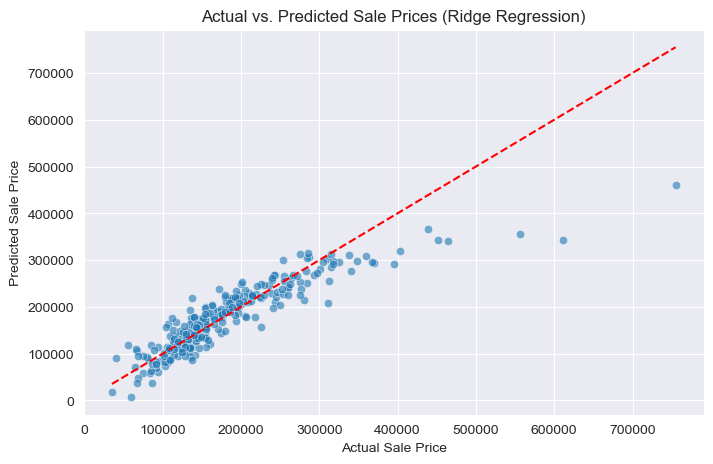

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_valid_sel, y=y_pred_ridge, alpha=0.6)
plt.plot([y_valid_sel.min(), y_valid_sel.max()], [y_valid_sel.min(), y_valid_sel.max()], 'r', linestyle='--')  # Perfect prediction line
plt.title("Actual vs. Predicted Sale Prices (Ridge Regression)")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

#### Residual Plot

The residual plot shows the difference between the actual sale price and the predicted sale price. The red dashed line represents the zero-error line where the predicted sale price is equal to the actual sale price. The points are scattered around the line, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy.

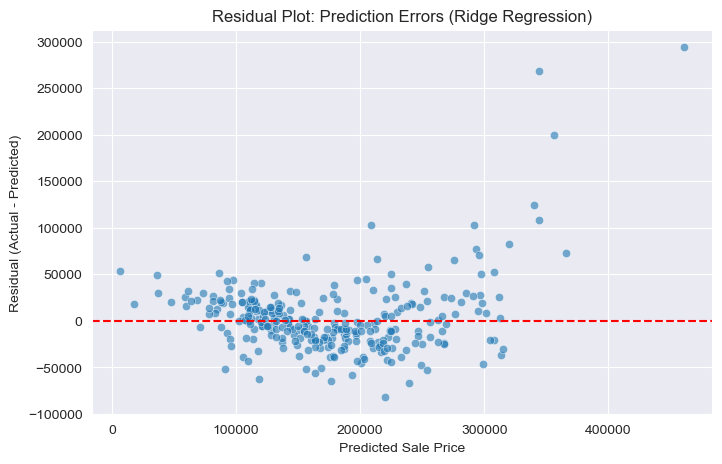

In [22]:
residuals_ridge = y_valid_sel - y_pred_ridge
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.title("Residual Plot: Prediction Errors (Ridge Regression)")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

#### Distribution of Prediction Errors

The histogram of the residuals shows the distribution of the prediction errors. The distribution is approximately normal, indicating that the model is able to predict the sale price of the house with some accuracy. The histogram also shows that there are a few outliers in the data, which are houses with a large difference between the actual sale price and the predicted sale price.

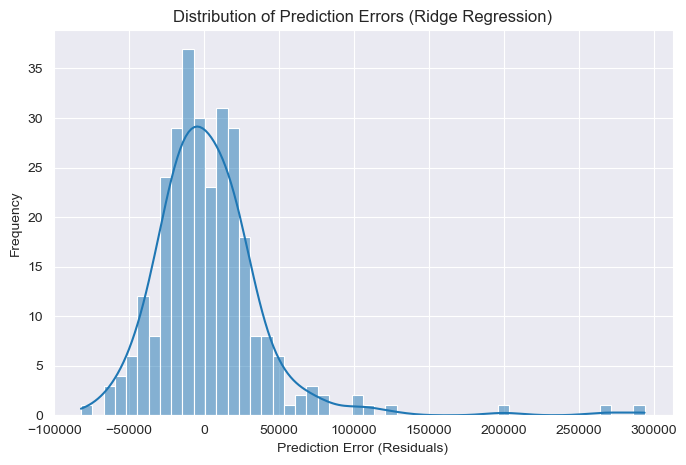

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(residuals_ridge, bins=50, kde=True)
plt.title("Distribution of Prediction Errors (Ridge Regression)")
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.show()

# Impact

The impact of the model on the business is that it can be used to predict the sale price of a house based on its features. This can help real estate agents and buyers to make informed decisions about the price of a house. The model can also be used to identify the most important features. This affects the sale price of a house, which can help real estate agents and buyers to focus on the features that are most relevant to the target variable.

From a social lens, the model can be used to help potential homebuyers make informed decisions when it comes to buying homes and providing the house of their price over the years. Some of the repercussions could be the risk that the model could reinforce an existing bias if the training data is either not representative of a population or reflects historical biases such as redlining or previous housing discrimination policies.

From an economic lens, the model can be used to help with stable housing markets by reducing the likelihood of overpricing or underpricing homes. This can help to stabilize housing markets and reduce the risk of housing bubbles. Some of the negative results of this in general practice is that the model could be to disrupt the traditional real estate practices which could lead to job losses for real estate professionals that give house pricing strategies.

From an ethical lens, the project can give more transparency in the housing market by providing essential data insights into house pricing. This can help with combating misinformation and prove a more clear goal for the basis of pricing. Some of the negative results of this could be a potential impact of data or privacy, for example, with home prices sell data being posted on a site like `Zillow` or potentially leaking sensitive information about the homeowners

Overall, the house price predication brings significant benefits, which can be important when mindful of the possible negative impacts and steps to mitigate them. This includes addressing the biases, ensuring proper data privacy is focused on, and confirming to social and ethical implications.


# Conclusion

The aim of the project was to predict the sale price of houses using several regression techniques. The dataset, improved categorical features and engineering new features. From the three models:
1. Linear Regression: RSME 0.14
2. Feature Selection: RSME 0.13
3. Ridge Regression: RSME 0.12, best forming model

From the experiments overall, several key points were learned
- The overall quality of the house is a strong predictor of the sale price
- The above-ground living area of the house is also a strong predictor of its sale price
- The number of cars that can fit in the garage is also a predictor of the sale price
- The number of full bathrooms in the house is also a predictor of the sale price
- The age of the house seems to be a predictor of the sale price

Regarding feature engineering: Creating new features such as `TotalSF`, `HouseAge`, and `YearsSinceRemodel` improved the model's performance, feature Selection: Selecting the most important features using a correlation analysis and the `SelectKBest` function improved the model's performance. Regarding model selection, the Ridge Regression model demonstrated the highest in accuracy and in predicting house prices, which seems to be a suitable model for working with this dataset. The overall use of this model can help with helping real estate agents and buyers to make informed decisions about the price of a house. The model can also be used to identify the most important features that affect the sale price of a house; this can help real estate agents and buyers to focus on the features that are most relevant to the target variable.


# References

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. Springer.

Kaggle. (n.d.). House Prices – Advanced Regression Techniques. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

The pandas development team. (n.d.). pandas.DataFrame.corr. pandas. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

The pandas development team. (n.d.). pandas.get_dummies. pandas. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

The seaborn development team. (n.d.). Seaborn: Statistical data visualization. https://seaborn.pydata.org/

The matplotlib development team. (n.d.). Matplotlib: Visualization with Python. https://matplotlib.org/

The pandas development team. (n.d.). Pandas. https://pandas.pydata.org/

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., … & Oliphant, T. E. (2020). Array programming with NumPy. Nature, 585(7825), 357–362. https://numpy.org/

## Notebook File
The notebook file can be found through my GitHub repository: https://github.com/ToyaOkey/ToyaOkey.github.io